## Model Project - The Bertrand Model Hackathon

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import Bertrand
from modelproject import BertrandN
from modelproject import DynamicBertrand
from modelproject import TriggerBertrand


### 1 Model description

I start by considering a duopolic economy consisting of 2 identical firms $i=1,2$ competing in a market characterized by perfect competition and a homogenous good. 

The firms set their prices $p_i$ simultaneously, 

The firms have an identical, constant marginal cost $c$. 

Demand is a downward sloping function of the prices set and maximum willingness to pay, $D=a-p$, or for a single firm: 

$$D(p_i ) = a - p_i \ if\ p_i < p_j$$
$$D(p_i) = (a-p_i)/2 \ if\ p_i=p_j$$
$$D(p_i) = 0 \ if\ p_i > p_j$$ 

Profit becomes: 
 $$\pi_i = (p_i-c)D(p_i)$$








Since firm $i$ can overtake the entire market by undercutting firm $j$, $p_i$ will converge to $c$, given $a>c$ 

### 2 Numerical solution

#### 2.1 Algorithm
The model is solved (and markets cleared) by:
1. Initialize by defining parameter values of a, c, and the number of simulation iterations
2. Define the demand and profit function according to the section above 
3. Find the Best Response (BR) function of firm $i$, which is the price $p_i$ that maximizes profit given the price of firm $j$ 
4. Find the BR function of firm $j$
5. Find the Nash equilibrium by computing the set of BR-values that solves both 3. and 4., or ensure the convergence of BR values
6. Calculate profits and quantity

#### 2.2 Testing the solver

I initialize with the parameters a = 10 and c = 1, and then a = 10 and c = 11 to check if it converges as expected :

In [2]:
Bertrand0  = Bertrand(10,1,1)
temp0 = Bertrand0.solve()


# Printing the extracted values
print('p1:', temp0[0])
print('p2:', temp0[1])
print('profit1:', temp0[2])
print('profit2:', temp0[3])
print('q1:', temp0[4])
print('q2:', temp0[5])


p1: 1
p2: 1
profit1: 0.0
profit2: 0.0
q1: 4.5
q2: 4.5


In [3]:
Bertrand1  = Bertrand(10,11,11)
temp1 = Bertrand1.solve()


# Printing the extracted values
print('p1:', temp1[0])
print('p2:', temp1[1])
print('profit1:', temp1[2])
print('profit2:', temp1[3])
print('q1:', temp1[4])
print('q2:', temp1[5])

p1: 11
p2: 11
profit1: 0.0
profit2: 0.0
q1: 0
q2: 0


Let's see if it can converge correctly with more awkward numbers:

In [4]:
Bertrand1  = Bertrand(15.2,4.6,2.2)
temp2 = Bertrand1.solve()


# Printing the extracted values
print('p1:', temp2[0])
print('p2:', temp2[1])
print('profit1:', temp2[2])
print('profit2:', temp2[3])
print('q1:', temp2[4])
print('q2:', temp2[5])

p1: 4.6
p2: 4.599992675781255
profit1: 0
profit2: 25.439939941352645
q1: 0
q2: 10.600007324218744


Firm 2 undercuts by $\epsilon$ to secure the whole market. Looks good.

#### 2.3 Solution as a function of parameters 
Let's try and see what happens when the firms face different marginal costs and maximum willingness to pay. 

In [5]:
def interactive_plot(a, c1, c2):
    bertrand = Bertrand(a, c1, c2)
    p1, p2, profit1, profit2, d1, d2 = bertrand.solve()
    
    total_price = min(p1, p2)
    total_quantity = a - total_price
    
    aggregate_prices = np.linspace(0, a, 100)
    aggregate_quantities = a - aggregate_prices

    plt.figure(figsize=(8, 6))
    plt.plot(aggregate_quantities, aggregate_prices, label='Aggregate Q as function of P')
    plt.scatter(total_quantity, total_price, color='red', label='Equilibrium')
    plt.text(total_quantity, total_price, f'({total_quantity:.2f}, {total_price:.2f})', ha='left', va='bottom')
    
    plt.xlabel('Aggregate Quantity')
    plt.ylabel('Aggregate Price')
    plt.title('Aggregate Price vs Quantity')
    plt.legend()
    
    plt.annotate(f'Firm 1:\nProfit = {profit1:.2f}\nPrice = {p1:.2f}\nQuantity = {d1:.2f}',
                 xy=(1.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')
    plt.annotate(f'Firm 2:\nProfit = {profit2:.2f}\nPrice = {p2:.2f}\nQuantity = {d2:.2f}',
                 xy=(1.05, 0.65), xycoords='axes fraction', fontsize=10, ha='left', va='bottom')
    
    plt.show()

interact(interactive_plot, a=(1, 10, 0.1), c1=(0, 10, 0.1), c2=(0, 10, 0.1));

interactive(children=(FloatSlider(value=5.0, description='a', max=10.0, min=1.0), FloatSlider(value=5.0, descr…

Nash eq. prices are unaffected by MWTP $a$, as they are determined by competition on $c$, instead larger quantities are consumed by the consumers when a increases. Quantities are determined by the relationship between a, c1, and c2.       

### 3 Model extensions

#### 3.1 Expansion to multiple firms

We have $n$ ($i=1,2,...n$) firms competing in a market characterized by perfect competition and a homogenous good,

firms set their prices $p_1, p_2, ..., p_n$ simultaneously,

firms face identical marginal costs $c_1 = c_2 =...=c_n$,

demand is a downwards sloping function of price and MWTP; 

$$D(p_i) = a - p_i \ if \ p_i < p_1, p_2,...,p_n$$ 
$$D(p_i) = (a- \frac{p_i}{k}) \ if\ p_i = p_j, p_l,...,p_k$$
$$D(p_i) = 0 \ if\ p_i > p_j$$

#### 3.2 Numerical solution

I start out by testing with +1 firms:

In [6]:
a = 10
costs = [1, 1, 1]  #marginal cost vector 
bertrand_model = BertrandN(a, costs)
prices, profits, demands = bertrand_model.solve()

print("Prices:", prices)
print("Profits:", profits)
print("Demands:", demands)

Prices: [1, 1, 1]
Profits: [0.0, 0.0, 0.0]
Demands: [3.0, 3.0, 3.0]


In [7]:
a1 = 5
costs1 = [1, 2, 3]  
bertrand_model1 = BertrandN(a1, costs)
prices1, profits1, demands1 = bertrand_model1.solve()

print("Prices:", prices1)
print("Profits:", profits1)
print("Demands:", demands1)

Prices: [1, 1, 1]
Profits: [0.0, 0.0, 0.0]
Demands: [1.3333333333333333, 1.3333333333333333, 1.3333333333333333]


Looks good so far. Let's try to up the ante:

In [8]:
a2 = 10 
c_min = 1  # minimum cost
c_max = 10  # maximum cost

costs2 = np.random.uniform(c_min, c_max, 100) #100 firms with random marginal costs in da house
bertrand_model2 = BertrandN(a2, costs2)
prices2, profits2, demands2 = bertrand_model2.solve()

print("Prices:", prices2)
print("Profits:", profits2)
print("Demands:", demands2)

Prices: [2.3815882081379587, 2.3407289812390646, 4.402172725450788, 4.512527864978812, 7.382553879788408, 5.71785591542648, 6.094740813812132, 7.510347294455991, 1.6111412117443527, 5.22606212785358, 2.691052106786235, 1.3343925756500497, 8.348983676709567, 2.9418586911912583, 6.376007896223939, 5.089942068911601, 3.8436808426994817, 8.037474271083198, 3.7766375618701318, 5.864820781683416, 3.6701217314827086, 9.035512740311345, 1.3640182699167291, 5.833591124841723, 5.457060898531731, 2.1473965522995435, 1.6726566927482938, 7.809690044360218, 7.905827267053797, 8.827513309158817, 1.15893881901529, 4.139701061767791, 9.058084766911533, 7.551895428584455, 1.5088766863678007, 5.043471614496563, 3.7504536375410025, 9.122197420847323, 1.459994384779921, 5.910851226506935, 3.081356900347049, 2.0128096463657257, 4.476218161885741, 9.086613330393586, 3.479095004240608, 4.496211646991557, 8.376087256284492, 5.691322191608276, 2.8881807884667197, 8.545392249326216, 7.238067751759624, 8.05488108

This is a bit much, luckily I made a new function that solves for the market clearing price:

In [9]:

prices3, profits3, demands3 = bertrand_model2.solvemin()

print("Pricemin:", prices3)
print("Profit:", profits3)
print("Demand:", demands3)

Pricemin: 1.0455334504701432
Profit: 0.07403767434328642
Demand: 8.954466549529856


#### 3.3 Dynamic 2-firm game

I make the game dynamic to examine its properties over time.

1. Set parameters, including the discount factor delta
2. Define demand and profit functions
3. Define BR functions as a function of current and future profits
4. Implement future prices as response to current

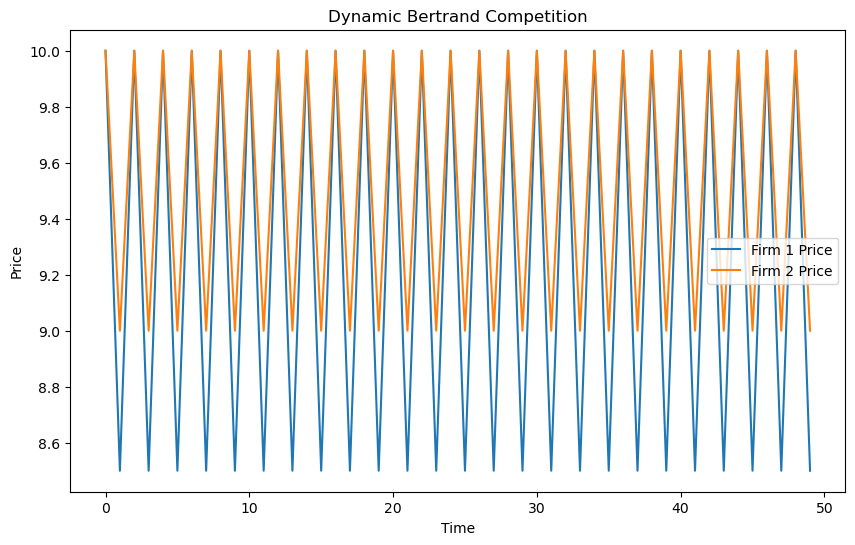

In [10]:
# Parameters
a = 10
c1 = 7
c2 = 8
n_periods = 50
beta = 0.95  # Discount factor

# Initializing the Bertrand model and simulating
bertrand = DynamicBertrand(a, c1, c2, beta, n_periods)
prices1, prices2 = bertrand.simulate()

# Plotting

plt.figure(figsize=(10, 6))
plt.plot(range(n_periods), prices1, label='Firm 1 Price')
plt.plot(range(n_periods), prices2, label='Firm 2 Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Dynamic Bertrand Competition')
plt.legend()
plt.show()

The prices oscillate because firms are headlessly adjusting prices according to the prices of last period. 

#### 3.4 Trigger Strategy

Let's try to induce cartels by seeing what happens if firms implements a trigger strategy of the classic type: 
1. Cooperate in the first period, 
2. If in any other period the other firm breaks cooperation, trigger noncooperation for all future periods. 

Unfortunately this end part will not be solved numerically, as going that direction proved increasingly difficult and computationally demanding the more I got into it.

In [11]:

# Parameters
a = 100
c1 = 3
c2 = 3
n_periods = 50

# Create the interactive plot
def plot_simulation(delta, a):
    # Create a new instance of the model with the selected discount factor
    model = TriggerBertrand(a, c1, c2, delta, n_periods)
    
    # Simulate the model
    prices1, prices2 = model.simulate()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(prices1, label='Firm 1 Price')
    plt.plot(prices2, label='Firm 2 Price')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Dynamic Bertrand Model with Trigger (delta={delta}) (a=)')
    plt.legend()
    plt.show()

# Use the interact function to create the slider for the discount factor
interact(plot_simulation, delta=(0.0, 1.0, 0.05), a = (0, 75, 5));

interactive(children=(FloatSlider(value=0.5, description='delta', max=1.0, step=0.05), IntSlider(value=35, des…

Varying the discount factor $\delta$ induces firms to alter their behaviour. If the future is discounted too much, or if uncertainty is too great, the incentive to deviate becomes too large, and firms will break cooperation, triggering the trigger strategy, leading to noncooperation. 

Higher marginal willingness to pay $a$ implies a higher permanent payout in the market, and thus less incentive to deviate, because demand is a simple linear function of $a-p$.   

### 4 Conclusion

This has been a short and fast project on how to numerically model some central aspects of a game theory classic, Bertrand competition.
